In [1]:
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import torch

from module import top_pr
from module import mode_drop
from prdc import compute_prdc

Test whether bandwidth function is correct with crater dataset

7536

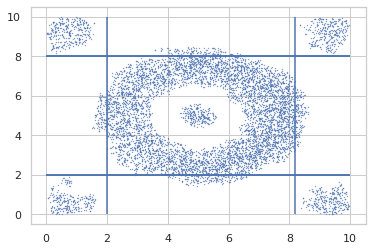

In [2]:
# Import crater dataset
import pickle
f = open("/home/pumjun/Topological_Experiment/crater_tuto", "rb")
crater = pickle.load(f)
f.close()
sns.set(style="whitegrid")
plot.scatter(crater[:,0], crater[:,1], s = 0.1)
plot.vlines(8.2, ymin = 0, ymax = 10)
plot.hlines(8, xmin = 0, xmax = 10)
plot.hlines(2, xmin = 0, xmax = 10)
plot.vlines(2, ymin = 0, ymax = 10)
plot.hlines(8, xmin = 0, xmax = 10)
plot.hlines(2, xmin = 0, xmax = 10)
len(crater)

In [ ]:
bandwidth_lst = np.array([.1,.3,.5,.7,.9])
top_pr.bandwidth_est(crater, bandwidth_lst, Plot = True)

In [ ]:
top_pr.bandwidth_est_h0(crater, bandwidth_lst, Plot = True)

In [ ]:
top_pr.bandwidth_est_h1(crater, bandwidth_lst, Plot = True)

sequential and simultaneous mode drop data generation

In [ ]:
# Sequential mode drop test
seq1 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 1, isnumpy = True)
seq2 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 2, isnumpy = True)
seq3 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 3, isnumpy = True)
seq4 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 4, isnumpy = True)

sns.set(style="whitegrid")
fig = plot.figure(figsize = (17,2))
for i in range(1,6):
    axes = fig.add_subplot(1,5,i)
    if (i == 1):
        axes.set_title("original data",fontsize = 15)
        plot.scatter(crater[:,0], crater[:,1], s = 0.1)
                
    elif (i == 2):
        axes.set_title("drop one mode",fontsize = 15)
        plot.scatter(seq1[:,0], seq1[:,1], s = 0.1)
            
    elif (i == 3):
        axes.set_title("drop two mode",fontsize = 15)
        plot.scatter(seq2[:,0], seq2[:,1], s = 0.1)

    elif (i == 4):
        axes.set_title("drop three mode",fontsize = 15)
        plot.scatter(seq3[:,0], seq3[:,1], s = 0.1)
            
    elif (i == 5):
        axes.set_title("drop four mode",fontsize = 15)
        plot.scatter(seq4[:,0], seq4[:,1], s = 0.1)

print(len(crater),len(seq1),len(seq2),len(seq3),len(seq4))

In [ ]:
# simultaneous mode drop test
sim1 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 0.25, isnumpy = True)
sim2 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 0.5, isnumpy = True)
sim3 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 0.75, isnumpy = True)
sim4 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 1, isnumpy = True)

sns.set(style="whitegrid")
fig = plot.figure(figsize = (17,2))
for i in range(1,6):
    axes = fig.add_subplot(1,5,i)
    if (i == 1):
        axes.set_title("original data",fontsize = 15)
        plot.scatter(crater[:,0], crater[:,1], s = 0.1)
                
    elif (i == 2):
        axes.set_title("drop one mode",fontsize = 15)
        plot.scatter(sim1[:,0], sim1[:,1], s = 0.1)
            
    elif (i == 3):
        axes.set_title("drop two mode",fontsize = 15)
        plot.scatter(sim2[:,0], sim2[:,1], s = 0.1)

    elif (i == 4):
        axes.set_title("drop three mode",fontsize = 15)
        plot.scatter(sim3[:,0], sim3[:,1], s = 0.1)
            
    elif (i == 5):
        axes.set_title("drop four mode",fontsize = 15)
        plot.scatter(sim4[:,0], sim4[:,1], s = 0.1)

print(len(crater),len(sim1),len(sim2),len(sim3),len(sim4))

Top P&R with sequential and simultaneous mode drop experiment

In [3]:
# Sequential mode drop test with top_pr
real_data = crater
# no drop
t_pr_seq = np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 0), bandwidth_list = np.array([.3,.5,.7]))])
# drop one
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 1), bandwidth_list = np.array([.3,.5,.7]))])))
# drop two
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 2), bandwidth_list = np.array([.3,.5,.7]))])))
# drop three
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 3), bandwidth_list = np.array([.3,.5,.7]))])))
# drop four
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 4), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_seq.npy", t_pr_seq)

 33%|███▎      | 1/3 [01:20<02:41, 80.98s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022373368981694525 , cn:  0.0069715910315131585


 67%|██████▋   | 2/3 [03:09<01:29, 89.36s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029730348959061372 , cn:  0.003760861623713363


100%|██████████| 3/3 [06:00<00:00, 120.27s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028780981920975075 , cn:  0.002390324707803638



 33%|███▎      | 1/3 [01:08<02:16, 68.24s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021352738222747206 , cn:  0.007175717183302623


 67%|██████▋   | 2/3 [02:58<01:20, 80.71s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029825503934175216 , cn:  0.0037418306286905938


100%|██████████| 3/3 [05:35<00:00, 111.78s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028339095323607268 , cn:  0.002478702027277199



 33%|███▎      | 1/3 [00:47<01:35, 47.77s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023798834567699278 , cn:  0.006686497914312208


 67%|██████▋   | 2/3 [01:58<00:54, 54.80s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030054789425648848 , cn:  0.0036959735303958683


100%|██████████| 3/3 [03:50<00:00, 76.73s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028936074741094282 , cn:  0.0023593061437797965



 33%|███▎      | 1/3 [00:40<01:21, 40.60s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02301703028928295 , cn:  0.006842858769995475


 67%|██████▋   | 2/3 [01:55<00:50, 50.76s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02987916727103682 , cn:  0.0037310979613182733


100%|██████████| 3/3 [03:38<00:00, 73.00s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028276020135541126 , cn:  0.002491317064890427



 33%|███▎      | 1/3 [00:35<01:11, 35.70s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022817417738038963 , cn:  0.0068827812802442715


 67%|██████▋   | 2/3 [01:34<00:42, 42.76s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030960313399545407 , cn:  0.003514868735616557


100%|██████████| 3/3 [03:10<00:00, 63.48s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02827564098300664 , cn:  0.002491392895397325


In [4]:
# Sequential mode drop test with top_pr_rf
real_data = crater
# no drop
t_pr_seq_rf = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 0), bandwidth_list = np.array([.3,.5,.7]))])
# drop one
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 1), bandwidth_list = np.array([.3,.5,.7]))])))
# drop two
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 2), bandwidth_list = np.array([.3,.5,.7]))])))
# drop three
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 3), bandwidth_list = np.array([.3,.5,.7]))])))
# drop four
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 4), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_rf_seq.npy", t_pr_seq_rf)

 33%|███▎      | 1/3 [00:41<01:22, 41.02s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022834513447859826 , cn:  0.006879362138280098


 67%|██████▋   | 2/3 [01:45<00:48, 48.13s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030437158905914377 , cn:  0.003619499634342762


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028620760110571918 , cn:  0.002422369069884269


 33%|███▎      | 1/3 [00:37<01:14, 37.26s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023033651495403012 , cn:  0.006839534528771461


 67%|██████▋   | 2/3 [01:40<00:45, 45.11s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.0301344482528561 , cn:  0.003680041764954418


100%|██████████| 3/3 [03:06<00:00, 62.09s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02857352991812449 , cn:  0.0024318151083737543



 33%|███▎      | 1/3 [00:39<01:19, 39.61s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023535555789066555 , cn:  0.006739153670038753


 67%|██████▋   | 2/3 [01:43<00:46, 46.83s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030315428289616156 , cn:  0.003643845757602406


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028141139221115073 , cn:  0.002518293247775638


 33%|███▎      | 1/3 [00:41<01:23, 41.58s/it]

bandwidth:  0.3 , N_0(h):  5.0 , S_0(h):  0.022192692215151775 , cn:  0.006875715661909319


 67%|██████▋   | 2/3 [01:43<00:47, 47.55s/it]

bandwidth:  0.5 , N_0(h):  5.0 , S_0(h):  0.026632462136633315 , cn:  0.0037655264334980148


100%|██████████| 3/3 [03:12<00:00, 64.07s/it]

bandwidth:  0.7 , N_0(h):  5.0 , S_0(h):  0.024694777273218692 , cn:  0.002405500303312244



 33%|███▎      | 1/3 [00:39<01:19, 39.78s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023755493453173546 , cn:  0.006695166137217355


 67%|██████▋   | 2/3 [01:44<00:47, 47.24s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030359858550263907 , cn:  0.003634959705472855


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028756872992592306 , cn:  0.002395146493480191


 33%|███▎      | 1/3 [00:44<01:28, 44.12s/it]

bandwidth:  0.3 , N_0(h):  4.0 , S_0(h):  0.016494593736142687 , cn:  0.0071866432656707835


 67%|██████▋   | 2/3 [01:44<00:48, 48.98s/it]

bandwidth:  0.5 , N_0(h):  4.0 , S_0(h):  0.021385352210854747 , cn:  0.0037564731991417476


100%|██████████| 3/3 [03:30<00:00, 70.31s/it]

bandwidth:  0.7 , N_0(h):  4.0 , S_0(h):  0.018683007857125112 , cn:  0.002470951829935109



 33%|███▎      | 1/3 [00:38<01:17, 38.79s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02145807078419155 , cn:  0.0071546506710137535


 67%|██████▋   | 2/3 [01:40<00:45, 45.76s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03130429507092246 , cn:  0.0034460724013411453


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029308436948460012 , cn:  0.0022848337023066508


 33%|███▎      | 1/3 [00:48<01:36, 48.06s/it]

bandwidth:  0.3 , N_0(h):  4.0 , S_0(h):  0.014584192132910644 , cn:  0.007209117178378791


 67%|██████▋   | 2/3 [02:10<00:58, 58.35s/it]

bandwidth:  0.5 , N_0(h):  3.0 , S_0(h):  0.016878172399846132 , cn:  0.0037215540993052777


100%|██████████| 3/3 [04:17<00:00, 85.91s/it]

bandwidth:  0.7 , N_0(h):  3.0 , S_0(h):  0.01356778836146543 , cn:  0.002494476062886393



 33%|███▎      | 1/3 [00:38<01:17, 38.78s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022497994830482267 , cn:  0.006946665861755611


 67%|██████▋   | 2/3 [01:47<00:47, 47.67s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030018018145223493 , cn:  0.003703327786480939


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02806720903433961 , cn:  0.0025330792851307304


 33%|███▎      | 1/3 [00:58<01:57, 58.50s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010790845299151617 , cn:  0.007612573842977419


 67%|██████▋   | 2/3 [02:28<01:08, 68.05s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.01117054050549163 , cn:  0.004132754828336772


100%|██████████| 3/3 [05:08<00:00, 102.96s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.008311472876846856 , cn:  0.002541473732748951


In [5]:
# Simultaneous mode drop test with top_pr
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_sim = np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])
    else:
        t_pr_sim = np.vstack((t_pr_sim, np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_sim.npy", t_pr_sim)

 33%|███▎      | 1/3 [00:39<01:19, 39.76s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02389744075215723 , cn:  0.006666776677420617


 67%|██████▋   | 2/3 [01:44<00:47, 47.38s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030951065545336186 , cn:  0.0035167183064584


100%|██████████| 3/3 [03:09<00:00, 63.28s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02807658890711107 , cn:  0.002531203310576439



 33%|███▎      | 1/3 [00:33<01:07, 33.78s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023696074236966604 , cn:  0.006707049980458743


 67%|██████▋   | 2/3 [01:31<00:40, 40.82s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03113730446693224 , cn:  0.0034794705221391892


100%|██████████| 3/3 [02:48<00:00, 56.11s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02890658426405572 , cn:  0.0023652042391875084



 33%|███▎      | 1/3 [00:28<00:57, 28.69s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023357559833673797 , cn:  0.006774752861117305


 67%|██████▋   | 2/3 [01:18<00:34, 34.94s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02960786394277848 , cn:  0.003785358626969942


100%|██████████| 3/3 [02:32<00:00, 50.76s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02883489687697286 , cn:  0.0023795417166040805



 33%|███▎      | 1/3 [00:32<01:05, 32.76s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021542886732384612 , cn:  0.007137687481375142


 67%|██████▋   | 2/3 [01:22<00:37, 37.95s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029101604003239103 , cn:  0.0038866106148778166


100%|██████████| 3/3 [02:37<00:00, 52.56s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028298161415146184 , cn:  0.002486888808969416



 33%|███▎      | 1/3 [00:41<01:22, 41.47s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02191990898351338 , cn:  0.007062283031149388


 67%|██████▋   | 2/3 [01:29<00:43, 43.57s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03130666049687941 , cn:  0.0034455993161497554


100%|██████████| 3/3 [02:43<00:00, 54.66s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028566713352172132 , cn:  0.0024331784215642265



 33%|███▎      | 1/3 [00:32<01:04, 32.17s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022098129654558065 , cn:  0.007026638896940451


 67%|██████▋   | 2/3 [01:24<00:38, 38.22s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029446471812852745 , cn:  0.003817637052955089


100%|██████████| 3/3 [02:33<00:00, 51.19s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028996098341614554 , cn:  0.002347301423675741



 33%|███▎      | 1/3 [00:31<01:02, 31.18s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023377700479789872 , cn:  0.00677072473189409


 67%|██████▋   | 2/3 [01:23<00:37, 37.56s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02959850961861613 , cn:  0.0037872294918024118


100%|██████████| 3/3 [02:46<00:00, 55.51s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028709101730470483 , cn:  0.0024047007459045565



 33%|███▎      | 1/3 [00:28<00:57, 28.76s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022607440141296623 , cn:  0.00692477679959274


 67%|██████▋   | 2/3 [01:16<00:34, 34.49s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02981599685030126 , cn:  0.0037437320454653854


100%|██████████| 3/3 [02:30<00:00, 50.01s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02932301383135659 , cn:  0.002281918325727335



 33%|███▎      | 1/3 [00:33<01:07, 33.51s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022655988179569257 , cn:  0.006915067191938213


 67%|██████▋   | 2/3 [01:23<00:38, 38.34s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030137913023416316 , cn:  0.003679348810842374


100%|██████████| 3/3 [02:35<00:00, 51.82s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.027837435777949202 , cn:  0.002579033936408812



 33%|███▎      | 1/3 [00:32<01:05, 32.63s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021364426396743193 , cn:  0.0071733795485034255


 67%|██████▋   | 2/3 [01:23<00:38, 38.17s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030539410048149432 , cn:  0.0035990494058957515


100%|██████████| 3/3 [02:47<00:00, 55.71s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028542565297215265 , cn:  0.0024380080325556



 33%|███▎      | 1/3 [00:34<01:09, 34.99s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022821541819071114 , cn:  0.006881956464037842


 67%|██████▋   | 2/3 [01:39<00:43, 43.92s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030567124685945912 , cn:  0.003593506478336455


100%|██████████| 3/3 [03:05<00:00, 61.69s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028707450902353958 , cn:  0.002405030911527861


In [6]:
# Simultaneous mode drop test with top_pr_rf
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_rf_sim = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])
    else:
        t_pr_rf_sim = np.vstack((t_pr_rf_sim, np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_rf_sim.npy", t_pr_rf_sim)

 33%|███▎      | 1/3 [00:40<01:20, 40.02s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02262694508828117 , cn:  0.00692087581019583


 67%|██████▋   | 2/3 [01:34<00:44, 44.29s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.0302666253114819 , cn:  0.003653606353229257


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028369902644328007 , cn:  0.002472540563133051


 33%|███▎      | 1/3 [00:38<01:17, 38.85s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.024029577176855013 , cn:  0.0066403493924810635


 67%|██████▋   | 2/3 [01:41<00:46, 46.13s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029951539804173682 , cn:  0.0037166234546909026


100%|██████████| 3/3 [03:05<00:00, 61.87s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028355230567102957 , cn:  0.0024754749785780407



 33%|███▎      | 1/3 [00:38<01:17, 38.75s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022947975305150234 , cn:  0.006856669766822017


 67%|██████▋   | 2/3 [01:38<00:45, 45.14s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02912411763776097 , cn:  0.003882107887973443


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02859830816521385 , cn:  0.002426859458955883


 33%|███▎      | 1/3 [00:41<01:22, 41.01s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.018991177112259144 , cn:  0.006855159446752685


 67%|██████▋   | 2/3 [01:36<00:45, 45.33s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.026657949804510712 , cn:  0.0036842799087771667


100%|██████████| 3/3 [02:58<00:00, 59.37s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.025553591428423957 , cn:  0.002430153469874888



 33%|███▎      | 1/3 [00:35<01:10, 35.18s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023429536135665615 , cn:  0.006760357600718941


 67%|██████▋   | 2/3 [01:25<00:39, 39.64s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030737742295709865 , cn:  0.0035593829563836644


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.027985140226321085 , cn:  0.0025494930467344357


 33%|███▎      | 1/3 [00:35<01:10, 35.28s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.013699667518650448 , cn:  0.007153741509891356


 67%|██████▋   | 2/3 [01:36<00:43, 43.01s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.023029151220326956 , cn:  0.003727949250998016


100%|██████████| 3/3 [03:02<00:00, 60.85s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.023022461062444953 , cn:  0.002315650134862403



 33%|███▎      | 1/3 [00:37<01:14, 37.29s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022747014341710343 , cn:  0.006896861959509995


 67%|██████▋   | 2/3 [01:39<00:44, 44.77s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029705089842283504 , cn:  0.003765913447068936


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029273267369838533 , cn:  0.002291867618030946


 33%|███▎      | 1/3 [00:34<01:09, 34.63s/it]

bandwidth:  0.3 , N_0(h):  5.0 , S_0(h):  0.012647163808491707 , cn:  0.0068441979224971


 67%|██████▋   | 2/3 [01:31<00:41, 41.40s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.019841704546699996 , cn:  0.00376078706714984


100%|██████████| 3/3 [02:58<00:00, 59.47s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.019176422885606455 , cn:  0.0025216478154312834



 33%|███▎      | 1/3 [00:39<01:19, 39.75s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02419132042412636 , cn:  0.006608000743026791


 67%|██████▋   | 2/3 [01:34<00:44, 44.21s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029762218784393425 , cn:  0.003754487658646952


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028436646703165865 , cn:  0.0024591917513654793


 33%|███▎      | 1/3 [00:35<01:11, 35.57s/it]

bandwidth:  0.3 , N_0(h):  3.0 , S_0(h):  0.009550534619172362 , cn:  0.007268487934665766


 67%|██████▋   | 2/3 [01:30<00:41, 41.34s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.016105375507196554 , cn:  0.0037797581976287747


100%|██████████| 3/3 [02:56<00:00, 58.74s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.015719475851500266 , cn:  0.0025693640502058904



 33%|███▎      | 1/3 [00:37<01:14, 37.33s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02357167228998743 , cn:  0.006731930369854578


 67%|██████▋   | 2/3 [01:45<00:46, 46.62s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030422768616989455 , cn:  0.003622377692127746


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028897951034491547 , cn:  0.002366930885100344


 33%|███▎      | 1/3 [00:37<01:15, 38.00s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.00912173632374115 , cn:  0.007332974111265507


 67%|██████▋   | 2/3 [01:38<00:44, 44.72s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.013690266064252686 , cn:  0.003801346434912549


100%|██████████| 3/3 [03:07<00:00, 62.63s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.013364726759032532 , cn:  0.00249188770874583



 33%|███▎      | 1/3 [00:39<01:18, 39.27s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023139222714557713 , cn:  0.006818420284940522


 67%|██████▋   | 2/3 [01:38<00:45, 45.38s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03033729396014409 , cn:  0.0036394726234968196


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029003989911309456 , cn:  0.0023457231097367614


 33%|███▎      | 1/3 [00:39<01:19, 39.73s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010607379018159502 , cn:  0.007416635463601014


 67%|██████▋   | 2/3 [01:35<00:44, 44.53s/it]

bandwidth:  0.5 , N_0(h):  4.0 , S_0(h):  0.011501816063848425 , cn:  0.0038673307942512403


100%|██████████| 3/3 [03:00<00:00, 60.29s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.011184188783145164 , cn:  0.002562144616496779



 33%|███▎      | 1/3 [00:36<01:13, 36.68s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022345316670888394 , cn:  0.006977201493674386


 67%|██████▋   | 2/3 [01:34<00:43, 43.13s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029630584050374963 , cn:  0.003780814605450645


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02841481424558321 , cn:  0.0024635582428820108


 33%|███▎      | 1/3 [00:31<01:03, 31.82s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010292302917770538 , cn:  0.007313310917397198


 67%|██████▋   | 2/3 [01:21<00:37, 37.24s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010746044599850152 , cn:  0.003791510806751886


100%|██████████| 3/3 [02:38<00:00, 52.95s/it]

bandwidth:  0.7 , N_0(h):  5.0 , S_0(h):  0.008337705711667372 , cn:  0.0024448302334740836



 33%|███▎      | 1/3 [00:30<01:01, 30.76s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02303414036010241 , cn:  0.006839436755831581


 67%|██████▋   | 2/3 [01:24<00:37, 37.57s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030558381668284812 , cn:  0.0035952550818686754


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029073049992813266 , cn:  0.0023319110934359997


 33%|███▎      | 1/3 [00:31<01:03, 31.97s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010958196056274464 , cn:  0.006871813739297846


 67%|██████▋   | 2/3 [01:21<00:37, 37.36s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.011302720461122262 , cn:  0.0038810780983139143


100%|██████████| 3/3 [02:43<00:00, 54.63s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.008151085487277998 , cn:  0.0025390234354886465



 33%|███▎      | 1/3 [00:28<00:56, 28.35s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023081667292142092 , cn:  0.006829931369423646


 67%|██████▋   | 2/3 [01:22<00:36, 36.07s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030556523252492584 , cn:  0.0035956267650271213


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028367996621365604 , cn:  0.0024729217677255315


 33%|███▎      | 1/3 [00:29<00:59, 29.94s/it]

bandwidth:  0.3 , N_0(h):  3.0 , S_0(h):  0.010310700665415888 , cn:  0.0070420216223922244


 67%|██████▋   | 2/3 [01:29<00:38, 38.89s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010827581167959434 , cn:  0.0038268835901104814


100%|██████████| 3/3 [02:45<00:00, 55.01s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.00807716265447024 , cn:  0.002491839293486057



 33%|███▎      | 1/3 [00:32<01:04, 32.50s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02253230647623925 , cn:  0.006939803532604214


 67%|██████▋   | 2/3 [01:18<00:36, 36.68s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029577975253114074 , cn:  0.003791336364902822


  0%|          | 0/3 [00:00<?, ?it/s]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02886461497454608 , cn:  0.002373598097089437


 33%|███▎      | 1/3 [00:41<01:23, 41.87s/it]

bandwidth:  0.3 , N_0(h):  3.0 , S_0(h):  0.011921222794457297 , cn:  0.007356278090038506


 67%|██████▋   | 2/3 [02:08<00:55, 55.33s/it]

bandwidth:  0.5 , N_0(h):  3.0 , S_0(h):  0.01166624805084818 , cn:  0.00387204684540141


100%|██████████| 3/3 [04:12<00:00, 84.04s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007932274736692741 , cn:  0.002556219187076275
